# Import libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

# Coordinates transformation

In [43]:
# Cell dimensions
XCELL = 42.
ZCELL = 13.

# X coordinates translation
global_x_shifts = [994.2, 947.4,-267.4,-261.5,]

# Z coordinates translations
local_z_shifts = [z*ZCELL for z in range(0,4)]
global_z_shifts = [823.5, 0, 823.5, 0]

# Open file

This code opens 1 files, reads line by line and returns a list of floats for each line.

In [9]:
'''data_file = "../data/calibration/Run000260/data_000000.txt"
with open(data_file) as f:
    for line in f:
        event = line.split()
        event = [float(i) for i in event]
        print(event)'''

[1.0, 6.0, 0.0, 4.0, 165.5, 170.5, 45.8, 0.0, 1.0, 101.4, 108.6, 66.7, 0.0, 2.0, 113.0, 139.0, 241.7, 3.0, 3.0, 19.92, 22.08, 20.0, 3.0, 4.0, 28.4, 55.6, 252.5, 3.0, 1.0, 11.22, 30.78, 181.7]
[2.0, 7.0, 2.0, 3.0, 355.0, 359.0, 36.7, 2.0, 1.0, 355.3, 358.7, 30.8, 2.0, 4.0, 316.0, 356.0, 371.7, 3.0, 2.0, 327.4, 344.6, 160.0, 3.0, 1.0, 343.9, 370.1, 243.3, 3.0, 4.0, 328.0, 344.0, 149.2, 3.0, 3.0, 344.4, 369.6, 233.3]
[3.0, 0.0]
[4.0, 12.0, 0.0, 1.0, 650.1, 651.9, 15.8, 2.0, 2.0, 165.8, 170.2, 41.7, 2.0, 4.0, 160.6, 175.4, 137.5, 2.0, 1.0, 127.7, 166.3, 359.2, 2.0, 3.0, 131.8, 162.2, 282.5, 3.0, 2.0, 40.56, 43.44, 26.7, 3.0, 1.0, 13.95, 28.05, 130.8, 3.0, 4.0, 35.31, 48.69, 124.2, 3.0, 3.0, 18.53, 23.47, 45.8, 3.0, 2.0, 25.94, 58.06, 298.3, 3.0, 3.0, 2.871, 39.13, 336.7, 3.0, 1.0, 48.24, 77.76, 274.2]
[5.0, 11.0, 2.0, 2.0, 76.95, 91.05, 130.8, 2.0, 3.0, 49.67, 76.33, 247.5, 2.0, 4.0, 74.94, 93.06, 168.3, 2.0, 1.0, 48.33, 77.67, 272.5, 3.0, 4.0, 41.6, 42.4, 7.5, 3.0, 3.0, 186.9, 191.1, 39.2

[1261.0, 8.0, 2.0, 1.0, 272.0, 274.0, 19.2, 2.0, 3.0, 271.7, 274.3, 23.3, 2.0, 2.0, 233.2, 270.8, 350.0, 2.0, 4.0, 233.8, 270.2, 337.5, 3.0, 3.0, 227.8, 234.2, 59.2, 3.0, 1.0, 226.0, 236.0, 92.5, 3.0, 2.0, 235.2, 268.8, 312.5, 3.0, 4.0, 234.2, 269.8, 330.8]
[1262.0, 0.0]
[1263.0, 7.0, 2.0, 1.0, 95.22, 114.8, 181.7, 2.0, 3.0, 97.28, 112.7, 143.3, 2.0, 2.0, 113.9, 138.1, 224.2, 2.0, 4.0, 112.5, 139.5, 250.8, 3.0, 1.0, 62.01, 63.99, 18.3, 3.0, 3.0, 61.61, 64.39, 25.8, 3.0, 4.0, 23.6, 60.4, 341.7]
[1266.0, 0.0]
[1267.0, 10.0, 0.0, 2.0, 496.7, 511.3, 135.8, 0.0, 2.0, 532.2, 559.8, 256.7, 0.0, 4.0, 574.8, 601.2, 245.0, 0.0, 3.0, 470.7, 495.3, 228.3, 0.0, 1.0, 553.2, 580.8, 255.8, 0.0, 1.0, 593.5, 624.5, 288.3, 0.0, 4.0, 489.7, 518.3, 265.8, 3.0, 3.0, 394.7, 403.3, 79.2, 3.0, 2.0, 411.9, 428.1, 150.0, 3.0, 4.0, 360.7, 395.3, 320.8]
[1268.0, 0.0]
[1269.0, 7.0, 2.0, 1.0, 61.25, 64.75, 32.5, 2.0, 3.0, 59.95, 66.05, 56.7, 2.0, 2.0, 22.79, 61.21, 356.7, 2.0, 4.0, 24.1, 59.9, 332.5, 3.0, 3.0, 10.37

[1876.0, 9.0, 2.0, 1.0, 53.44, 72.56, 177.5, 2.0, 2.0, 71.62, 96.38, 230.0, 2.0, 3.0, 55.15, 70.85, 145.8, 2.0, 4.0, 70.76, 97.24, 245.8, 3.0, 2.0, 40.83, 43.17, 21.7, 3.0, 4.0, 40.79, 43.21, 22.5, 3.0, 3.0, 2.288, 39.71, 347.5, 3.0, 1.0, 48.91, 77.09, 261.7, 3.0, 3.0, 45.86, 80.14, 318.3]
[1877.0, 8.0, 2.0, 1.0, 61.7, 64.3, 24.2, 2.0, 3.0, 60.94, 65.06, 38.3, 2.0, 2.0, 22.21, 61.79, 367.5, 2.0, 4.0, 23.6, 60.4, 341.7, 3.0, 3.0, 17.81, 24.19, 59.2, 3.0, 2.0, 40.07, 43.93, 35.8, 3.0, 1.0, 16.47, 25.53, 84.2, 3.0, 4.0, 23.47, 60.53, 344.2]
[1878.0, 4.0, 0.0, 1.0, 607.1, 610.9, 35.0, 0.0, 3.0, 602.6, 615.4, 119.2, 0.0, 4.0, 617.2, 642.8, 237.5, 0.0, 2.0, 611.8, 648.2, 337.5]
[1879.0, 16.0, 2.0, 2.0, 288.9, 299.1, 94.2, 2.0, 4.0, 291.7, 296.3, 43.3, 2.0, 1.0, 298.8, 331.2, 300.0, 2.0, 3.0, 298.2, 331.8, 312.5, 3.0, 3.0, 20.1, 21.9, 16.7, 3.0, 2.0, 244.9, 259.1, 131.7, 3.0, 1.0, 15.66, 26.34, 99.2, 3.0, 3.0, 139.3, 154.7, 143.3, 3.0, 2.0, 157.5, 178.5, 194.2, 3.0, 2.0, 22.17, 61.83, 368.3, 

[2905.0, 23.0, 2.0, 3.0, 104.3, 105.7, 12.5, 2.0, 2.0, 376.2, 379.8, 34.2, 2.0, 2.0, 124.2, 127.8, 32.5, 2.0, 3.0, 6.103, 35.9, 276.7, 2.0, 1.0, 388.0, 410.0, 205.0, 2.0, 4.0, 78.17, 89.83, 108.3, 2.0, 4.0, 152.9, 183.1, 280.8, 2.0, 1.0, 4.533, 37.47, 305.8, 2.0, 2.0, 77.99, 90.01, 111.7, 2.0, 1.0, 87.19, 122.8, 330.8, 3.0, 3.0, 62.78, 63.22, 4.2, 3.0, 3.0, 144.9, 149.1, 39.2, 3.0, 2.0, 39.85, 44.15, 40.0, 3.0, 2.0, 161.8, 174.2, 115.8, 3.0, 4.0, 108.2, 143.8, 330.0, 3.0, 1.0, 3.456, 38.54, 325.8, 3.0, 1.0, 173.9, 204.1, 280.8, 3.0, 4.0, 41.1, 42.9, 16.7, 3.0, 1.0, 163.3, 214.7, 477.5, 3.0, 3.0, 7.853, 34.15, 244.2, 3.0, 1.0, 60.94, 65.06, 38.3, 3.0, 4.0, 65.06, 102.9, 351.7, 3.0, 2.0, 25.8, 58.2, 300.8]
[2906.0, 8.0, 0.0, 4.0, 248.8, 255.2, 59.2, 0.0, 3.0, 217.2, 244.8, 256.7, 1.0, 2.0, 585.5, 590.5, 46.7, 1.0, 3.0, 601.6, 616.4, 138.3, 1.0, 4.0, 585.4, 590.6, 49.2, 1.0, 3.0, 589.1, 628.9, 369.2, 1.0, 4.0, 571.5, 604.5, 306.7, 1.0, 1.0, 551.9, 582.1, 280.8]
[2907.0, 0.0]
[2908.0, 0.0]

[3806.0, 0.0]
[3807.0, 0.0]
[3808.0, 0.0]
[3809.0, 0.0]
[3810.0, 6.0, 2.0, 4.0, 39.17, 44.83, 52.5, 2.0, 2.0, 40.03, 43.97, 36.7, 2.0, 1.0, 1.705, 40.3, 358.3, 2.0, 3.0, 2.334, 39.67, 346.7, 3.0, 1.0, 10.01, 31.99, 204.2, 3.0, 3.0, 9.423, 32.58, 215.0]
[3811.0, 9.0, 0.0, 3.0, 519.3, 530.7, 105.8, 0.0, 2.0, 495.6, 512.4, 155.8, 0.0, 1.0, 506.4, 543.6, 345.0, 1.0, 4.0, 625.5, 634.5, 83.3, 1.0, 1.0, 563.4, 570.6, 66.7, 1.0, 1.0, 604.0, 614.0, 92.5, 1.0, 2.0, 532.4, 559.6, 252.5, 1.0, 3.0, 605.4, 612.6, 67.5, 1.0, 2.0, 617.8, 642.2, 225.8]
[3812.0, 43.0, 0.0, 1.0, 439.8, 442.2, 21.7, 0.0, 2.0, 543.2, 548.8, 52.5, 0.0, 3.0, 599.8, 618.2, 171.7, 0.0, 3.0, 648.8, 653.2, 40.8, 0.0, 3.0, 559.2, 574.8, 144.2, 0.0, 2.0, 615.8, 644.2, 264.2, 0.0, 4.0, 660.7, 683.3, 210.0, 0.0, 1.0, 510.1, 539.9, 275.8, 0.0, 4.0, 569.5, 606.5, 343.3, 0.0, 1.0, 637.1, 664.9, 257.5, 0.0, 1.0, 547.9, 586.1, 354.2, 1.0, 3.0, 475.9, 490.1, 131.7, 2.0, 2.0, 376.7, 379.3, 24.2, 2.0, 4.0, 246.0, 258.0, 110.8, 2.0, 4.0, 367

[4451.0, 4.0, 0.0, 2.0, 628.1, 631.9, 35.8, 0.0, 4.0, 618.5, 641.5, 213.3, 0.0, 1.0, 597.7, 620.3, 210.0, 0.0, 3.0, 635.2, 666.8, 292.5]
[4452.0, 2.0, 2.0, 1.0, 57.26, 68.74, 106.7, 2.0, 2.0, 78.03, 89.97, 110.8]
[4453.0, 0.0]
[4454.0, 0.0]
[4455.0, 6.0, 2.0, 1.0, 62.42, 63.58, 10.8, 2.0, 3.0, 62.73, 63.27, 5.0, 3.0, 1.0, 15.93, 26.07, 94.2, 3.0, 3.0, 16.47, 25.53, 84.2, 3.0, 2.0, 26.03, 57.97, 296.7, 3.0, 4.0, 24.73, 59.27, 320.8]
[4456.0, 1.0, 3.0, 3.0, 1.705, 40.3, 358.3]
[4457.0, 8.0, 2.0, 1.0, 102.5, 107.5, 46.7, 2.0, 3.0, 99.17, 110.8, 108.3, 2.0, 2.0, 68.43, 99.57, 289.2, 2.0, 4.0, 69.51, 98.49, 269.2, 3.0, 3.0, 60.98, 65.02, 37.5, 3.0, 1.0, 59.5, 66.5, 65.0, 3.0, 2.0, 66.32, 101.7, 328.3, 3.0, 4.0, 64.93, 103.1, 354.2]
[4458.0, 5.0, 2.0, 1.0, 11.04, 30.96, 185.0, 2.0, 3.0, 11.76, 30.24, 171.7, 2.0, 2.0, 30.56, 53.44, 212.5, 2.0, 4.0, 29.53, 54.47, 231.7, 3.0, 1.0, 1.392, 40.61, 364.2]
[4459.0, 6.0, 2.0, 2.0, 40.7, 43.3, 24.2, 2.0, 4.0, 39.8, 44.2, 40.8, 2.0, 1.0, 0.9877, 41.01,

[5486.0, 6.0, 0.0, 1.0, 176.1, 201.9, 239.2, 3.0, 3.0, 272.1, 273.9, 15.8, 3.0, 1.0, 312.6, 317.4, 44.2, 3.0, 4.0, 248.0, 256.0, 74.2, 3.0, 2.0, 289.9, 298.1, 75.8, 3.0, 1.0, 339.5, 374.5, 325.8]
[5487.0, 2.0, 3.0, 2.0, 625.3, 634.7, 86.7, 3.0, 1.0, 636.9, 665.1, 261.7]
[5488.0, 8.0, 2.0, 2.0, 81.26, 86.74, 50.8, 2.0, 4.0, 82.34, 85.66, 30.8, 2.0, 1.0, 87.14, 122.9, 331.7, 2.0, 3.0, 86.6, 123.4, 341.7, 3.0, 2.0, 32.31, 51.69, 180.0, 3.0, 4.0, 33.16, 50.84, 164.2, 3.0, 1.0, 51.74, 74.26, 209.2, 3.0, 3.0, 51.11, 74.89, 220.8]
[5489.0, 8.0, 0.0, 2.0, 367.9, 388.1, 187.5, 0.0, 1.0, 393.8, 404.2, 96.7, 0.0, 3.0, 392.8, 405.2, 115.0, 0.0, 1.0, 382.4, 415.6, 307.5, 1.0, 3.0, 643.6, 658.4, 138.3, 1.0, 2.0, 621.4, 638.6, 160.0, 1.0, 1.0, 633.5, 668.5, 325.8, 1.0, 4.0, 612.3, 647.7, 329.2]
[5490.0, 0.0]
[5491.0, 0.0]
[5492.0, 0.0]
[5493.0, 7.0, 2.0, 3.0, 222.5, 239.5, 157.5, 2.0, 2.0, 240.4, 263.6, 215.0, 2.0, 4.0, 239.0, 265.0, 241.7, 2.0, 1.0, 220.4, 241.6, 197.5, 3.0, 3.0, 187.8, 190.2, 21.7,

Let's just use 1 line, in order to test the code.

In [105]:
data_file = "../data/calibration/Run000260/data_000000.txt"
with open(data_file) as f:
    line = f.readline()
    line = f.readline()
    line = f.readline()
    line = f.readline()
    line = f.readline()
    event = line.split()
    #event = [float(i) for i in event]
    print(event)

['5', '11', '2', '2', '7.695e+01', '9.105e+01', '130.8', '2', '3', '4.967e+01', '7.633e+01', '247.5', '2', '4', '7.494e+01', '9.306e+01', '168.3', '2', '1', '4.833e+01', '7.767e+01', '272.5', '3', '4', '4.160e+01', '4.240e+01', '7.5', '3', '3', '1.869e+02', '1.911e+02', '39.2', '3', '2', '4.065e+01', '4.335e+01', '25.0', '3', '1', '1.421e+02', '1.519e+02', '91.7', '3', '4', '1.532e+02', '1.828e+02', '275.0', '3', '1', '4.362e+01', '8.238e+01', '360.0', '3', '3', '4.312e+01', '8.288e+01', '369.2']


# Read data

- **Input**: 1 row of data_file.txt, e.g. 1 event, passed as a `list`
- **Output**: pandas dataframe as in the *Data Format* paragraph, Number of the Event, Number of hits in the Event

This function takes in input one event at time, and then outputs a pandas dataframe as described in the previous section. In addition, the transformation from local to global coordinates is performed.

In [106]:
def read_data(event):    
    event_number = int(event[0])
    hits_number  = int(event[1])
    hit       = np.arange(hits_number)
    chamber   = np.fromiter((event[2+5*i] for i in range(hits_number)), int)
    layer     = np.fromiter((event[3+5*i] for i in range(hits_number)), int)
    xl_local  = np.fromiter((event[4+5*i] for i in range(hits_number)), float)
    xr_local  = np.fromiter((event[5+5*i] for i in range(hits_number)), float)
    z_local   = np.fromiter((local_z_shifts[i-1] for i in layer), float)
    time      = np.fromiter((event[6+5*i] for i in range(hits_number)), float)
    xl_global = np.fromiter((global_x_shifts[i] for i in chamber), float) - xl_local
    xr_global = np.fromiter((global_x_shifts[i] for i in chamber), float) - xr_local
    z_global  = np.fromiter((global_z_shifts[i] for i in chamber), float) + z_local
    dataframe = pd.DataFrame(
        { 'EvNumber' : event_number,
          'Hit'      : hit,
          'Chamber'  : chamber,
          'Layer'    : layer,
          'XL_local' : xl_local,
          'XR_local' : xr_local,
          'Z_local'  : z_local,
          'Time'     : time,
          'XL_global': xl_global,
          'XR_global': xr_global,
          'Z_global' : z_global,
        })
    dataframe.set_index('Hit', inplace=True) # set as index the number of the hit 
    return dataframe, event_number, hits_number

ev, evNumber, hits = read_data(event)
ev

,EvNumber,Chamber,Layer,XL_local,XR_local,Z_local,Time,XL_global,XR_global,Z_global
Hit,,,,,,,,,,
0,5,2,2,76.95,91.05,13.0,130.8,-344.35,-358.45,836.5
1,5,2,3,49.67,76.33,26.0,247.5,-317.07,-343.73,849.5
2,5,2,4,74.94,93.06,39.0,168.3,-342.34,-360.46,862.5
3,5,2,1,48.33,77.67,0.0,272.5,-315.73,-345.07,823.5
4,5,3,4,41.60,42.40,39.0,7.5,-303.10,-303.90,39.0
5,5,3,3,186.90,191.10,26.0,39.2,-448.40,-452.60,26.0
6,5,3,2,40.65,43.35,13.0,25.0,-302.15,-304.85,13.0
7,5,3,1,142.10,151.90,0.0,91.7,-403.60,-413.40,0.0
8,5,3,4,153.20,182.80,39.0,275.0,-414.70,-444.30,39.0


# Plot events

- **Input**: pandas dataframe (1 event)
- **Output**: pyplot Figure (global image + 4 detectors zooms)

The input of the function is the pandas dataframe made by the *Read Data* function. Five plots are given as output: one image of the whole detector, and one for each of the 4 chambers. In the images there will be the points of the hits tracked in the event (left/right positions must have different colors).

*Let's start drawing the position of the of the four drift-tubes detectors, and the 4 zoomed images*

In [141]:
# chamber height = 4*ZCELL = 52 mm
#         length = 720 mm (guessed) 

chamber0_position = np.array([[global_x_shifts[0], global_z_shifts[0]],
                      [global_x_shifts[0] - 720, global_z_shifts[0]],
                      [global_x_shifts[0] - 720, global_z_shifts[0] + 52],
                      [global_x_shifts[0], global_z_shifts[0] + 52]])
chamber1_position = np.array([[global_x_shifts[1], global_z_shifts[1]],
                      [global_x_shifts[1] - 720, global_z_shifts[1]],
                      [global_x_shifts[1] - 720, global_z_shifts[1] + 52],
                      [global_x_shifts[1], global_z_shifts[1] + 52]])
chamber2_position = np.array([[global_x_shifts[2], global_z_shifts[2]],
                      [global_x_shifts[2] - 720, global_z_shifts[2]],
                      [global_x_shifts[2] - 720, global_z_shifts[2] + 52],
                      [global_x_shifts[2], global_z_shifts[2] + 52]])
chamber3_position = np.array([[global_x_shifts[3], global_z_shifts[3]],
                      [global_x_shifts[3] - 720, global_z_shifts[3]],
                      [global_x_shifts[3] - 720, global_z_shifts[3] + 52],
                      [global_x_shifts[3], global_z_shifts[3] + 52]])

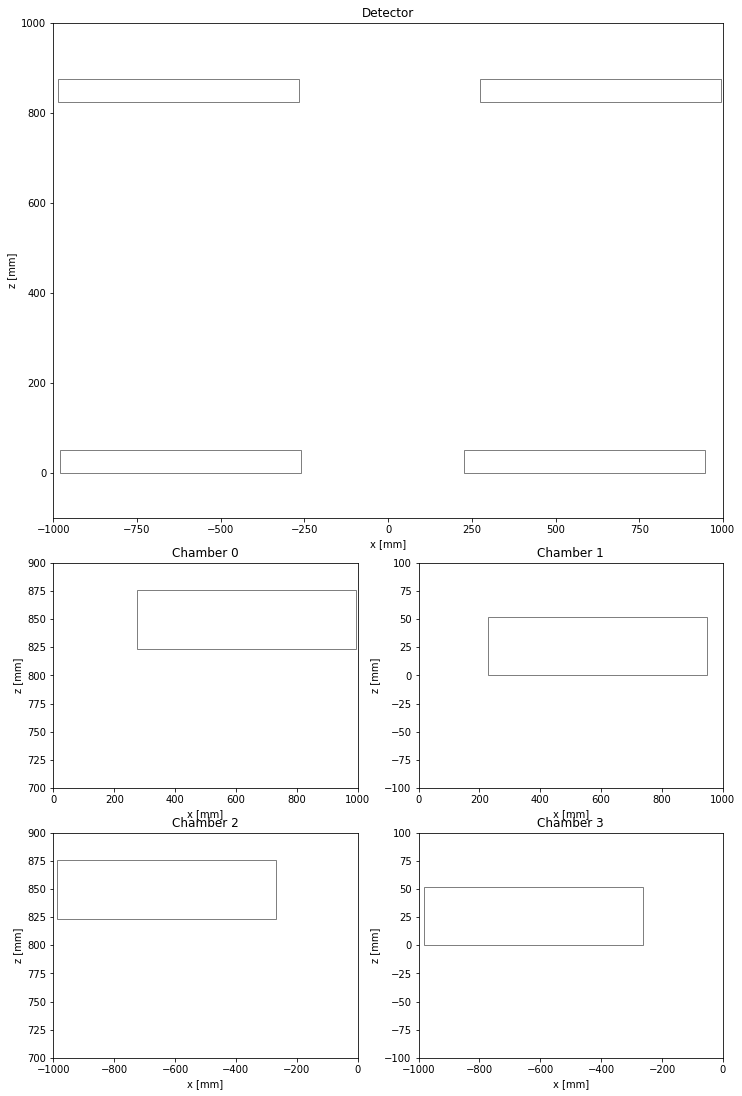

In [145]:
gridsize = (5, 2)
fig = plt.figure(figsize = (12, 24)) # figsize = (width, height) in inches

ax_global = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax_global.set_title("Detector")
ax_global.set_xlim(left=-1000, right=1000)
ax_global.set_ylim(bottom=-100, top=1000)
ax_global.set_xlabel("x [mm]")
ax_global.set_ylabel("z [mm]")
ax_global.fill(chamber0_position[:,0], chamber0_position[:,1], color='gray', fill=False)
ax_global.fill(chamber1_position[:,0], chamber1_position[:,1], color='gray', fill=False)
ax_global.fill(chamber2_position[:,0], chamber2_position[:,1], color='gray', fill=False)
ax_global.fill(chamber3_position[:,0], chamber3_position[:,1], color='gray', fill=False)

ax_0 = plt.subplot2grid(gridsize, (2, 0), colspan=1, rowspan=1)
ax_0.set_title("Chamber 0")
ax_0.set_xlim(left=0, right=1000)
ax_0.set_ylim(bottom=700, top=900)
ax_0.set_xlabel("x [mm]")
ax_0.set_ylabel("z [mm]")
ax_0.fill(chamber0_position[:,0], chamber0_position[:,1], color='gray', fill=False)
ax_0.fill(chamber1_position[:,0], chamber1_position[:,1], color='gray', fill=False)
ax_0.fill(chamber2_position[:,0], chamber2_position[:,1], color='gray', fill=False)
ax_0.fill(chamber3_position[:,0], chamber3_position[:,1], color='gray', fill=False)

ax_1 = plt.subplot2grid(gridsize, (2, 1), colspan=1, rowspan=1)
ax_1.set_title("Chamber 1")
ax_1.set_xlim(left=0, right=1000)
ax_1.set_ylim(bottom=-100, top=100)
ax_1.set_xlabel("x [mm]")
ax_1.set_ylabel("z [mm]")
ax_1.fill(chamber0_position[:,0], chamber0_position[:,1], color='gray', fill=False)
ax_1.fill(chamber1_position[:,0], chamber1_position[:,1], color='gray', fill=False)
ax_1.fill(chamber2_position[:,0], chamber2_position[:,1], color='gray', fill=False)
ax_1.fill(chamber3_position[:,0], chamber3_position[:,1], color='gray', fill=False)

ax_2 = plt.subplot2grid(gridsize, (3, 0), colspan=1, rowspan=1)
ax_2.set_title("Chamber 2")
ax_2.set_xlim(left=-1000, right=0)
ax_2.set_ylim(bottom=700, top=900)
ax_2.set_xlabel("x [mm]")
ax_2.set_ylabel("z [mm]")
ax_2.fill(chamber0_position[:,0], chamber0_position[:,1], color='gray', fill=False)
ax_2.fill(chamber1_position[:,0], chamber1_position[:,1], color='gray', fill=False)
ax_2.fill(chamber2_position[:,0], chamber2_position[:,1], color='gray', fill=False)
ax_2.fill(chamber3_position[:,0], chamber3_position[:,1], color='gray', fill=False)

ax_3 = plt.subplot2grid(gridsize, (3, 1), colspan=1, rowspan=1)
ax_3.set_title("Chamber 3")
ax_3.set_xlim(left=-1000, right=0)
ax_3.set_ylim(bottom=-100, top=100)
ax_3.set_xlabel("x [mm]")
ax_3.set_ylabel("z [mm]")
ax_3.fill(chamber0_position[:,0], chamber0_position[:,1], color='gray', fill=False)
ax_3.fill(chamber1_position[:,0], chamber1_position[:,1], color='gray', fill=False)
ax_3.fill(chamber2_position[:,0], chamber2_position[:,1], color='gray', fill=False)
ax_3.fill(chamber3_position[:,0], chamber3_position[:,1], color='gray', fill=False)


AttributeError: 'Figure' object has no attribute 'plot'